In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/diabetes-dataset/diabetes2.csv


In [2]:
import chardet
with open("/kaggle/input/diabetes-dataset/diabetes2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv', encoding =  'ascii')
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

To remove any duplicates in the dataset

In [7]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
df.shape # No duplicates

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


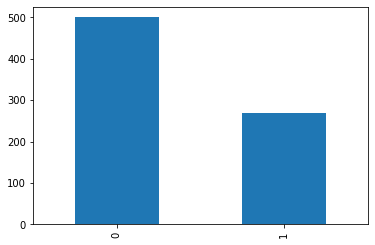

In [10]:
df.Outcome.value_counts().plot(kind='bar')
plt.show()

In [11]:
df.groupby('Outcome').mean() # to check the average values under each column for diabetic and non diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Check out the data in Glucose Column**

****Check out for diabatic person****

In [12]:
df[df.Outcome == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


**We have to remove the Outliers else it would affect the output, As it is observed that women who are diabatic have an mean glucose of 140+ this indicates that the glucose is high for diabitic patients and hence it cannot be 0. And this data should be removed**

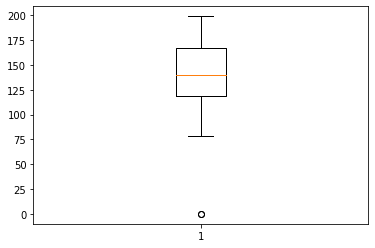

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [13]:
plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df[((df.Outcome == 1) & (df.Glucose == 0))]

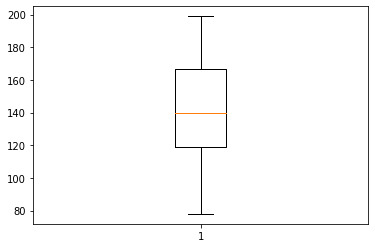

(766, 9)

In [14]:
df = df[~((df.Outcome == 1) & (df.Glucose == 0))]

plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df.shape

**Check out for non-diabatic person**

In [15]:
df[(df.Outcome == 0) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


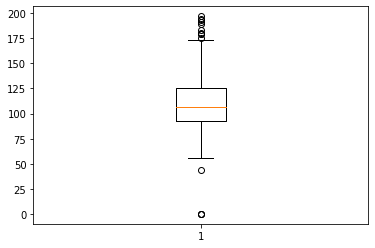

In [16]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

In [17]:
df[df.Outcome == 0].Glucose.describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [18]:
Q1 = df[df.Outcome == 0].Glucose.quantile(0.25)
Q2 = df[df.Outcome == 0].Glucose.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.Glucose < (Q1 - 1.5 * IQR)) |(df.Glucose > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]


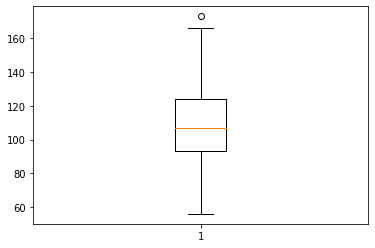

count    486.000000
mean     109.230453
std       22.326637
min       56.000000
25%       93.000000
50%      107.000000
75%      124.000000
max      173.000000
Name: Glucose, dtype: float64

In [19]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

df[df.Outcome == 0].Glucose.describe()

**Check out the data in BloodPressure Column**


**Check out for diabatic women**

In [20]:
df[df.Outcome == 1].BloodPressure.describe()

count    266.000000
mean      70.800752
std       21.564685
min        0.000000
25%       66.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

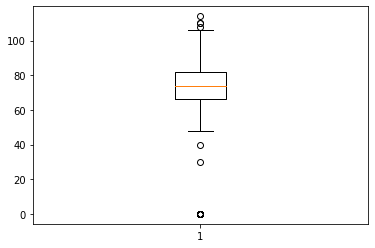

In [21]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [22]:
Q1 = df[df.Outcome == 1].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 1].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 1))]


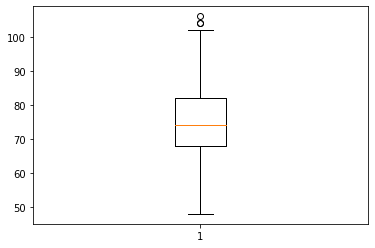

In [23]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [24]:
print(df[df.Outcome == 1].BloodPressure.describe())
print(df.shape)

count    244.000000
mean      75.086066
std       11.039248
min       48.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      106.000000
Name: BloodPressure, dtype: float64
(730, 9)


**Check out for non-diabatic women**

In [25]:
df[df.Outcome == 0].BloodPressure.describe()

count    486.000000
mean      68.006173
std       18.066029
min        0.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

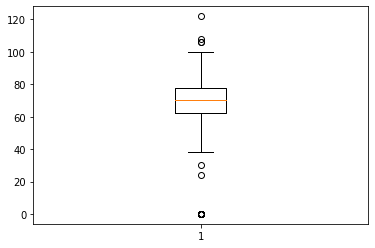

In [26]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [27]:
Q1 = df[df.Outcome == 0].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 0].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]


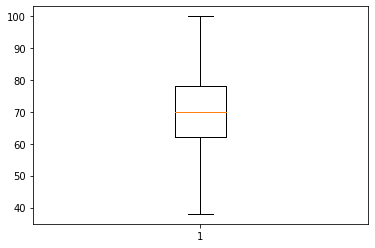

In [28]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [29]:
df[df.Outcome == 0].BloodPressure.describe()

count    461.000000
mean      70.618221
std       11.082184
min       38.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      100.000000
Name: BloodPressure, dtype: float64

In [30]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1


**Separating the dataset**

In [31]:
X = df.drop(columns = 'Outcome', axis = 1)
Y = df.Outcome

print(X,Y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Data Standardization**

In [32]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)

In [33]:
X = Standard_data
print(X)
print(Y)

[[ 0.6484389   0.90132294 -0.01462025 ...  0.20629558  0.47926536
   1.42641901]
 [-0.8474689  -1.21387618 -0.5477554  ... -0.7813535  -0.37872943
  -0.18979505]
 [ 1.24680202  2.07643357 -0.72546711 ... -1.24695949  0.61915581
  -0.10473115]
 ...
 [ 0.34925734 -0.00519096 -0.01462025 ... -0.83779059 -0.70824916
  -0.27485895]
 [-0.8474689   0.16268198 -1.08089054 ... -0.28752896 -0.38494678
   1.17122732]
 [-0.8474689  -0.94527946 -0.19233197 ... -0.24520114 -0.49064179
  -0.87030624]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 705, dtype: int64


***Train Test Split***

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 1)


In [35]:
print(X.shape, X_train.shape, X_test.shape)

(705, 8) (564, 8) (141, 8)


**Train the Model**

**(1) SVM Classifier**

In [36]:
classifier1 = svm.SVC(kernel='linear')
classifier1.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

**Determining Accuracy Score**

In [37]:
X_train_predict = classifier1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)
training_data_accuracy

0.7730496453900709

In [38]:
X_test_predict = classifier1.predict(X_test)

test_data_accuracy = accuracy_score(X_test_predict, Y_test)

test_data_accuracy

0.8226950354609929

**Predicting Model**

In [39]:
input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 = (1,85,66,29,0,26.6,0.351,31)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshape)

# Prediction
prediction = classifier1.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic


**Train the Model**

**(2) Logistic Regression**

In [40]:
classifier2 = LogisticRegression()


classifier2.fit(X_train, Y_train)

LogisticRegression()

**Model Evaluation**

**Determining Accuracy Score**

In [41]:
X_train_predict = classifier2.predict(X_train)

training_data_accuracy = accuracy_score(X_train_predict, Y_train)

print(training_data_accuracy)

0.7695035460992907


**Test Model**

In [42]:
X_test_predict = classifier2.predict(X_test)

test_data_accuracy = accuracy_score(X_test_predict, Y_test)

print(test_data_accuracy)

0.8297872340425532


**Predicting Model**

In [43]:
input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 = (1,85,66,29,0,26.6,0.351,31)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data2)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshape)

# Prediction
prediction = classifier2.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Not Diabetic
